# Quantum Mechanics: The hydrogen atom

In this tutorial, we will explore the hydrogen atom. We will start by solving the Schrödinger equation for the hydrogen atom, and then we will use the results to calculate the energy levels and the wave functions of the hydrogen atom. We will also visualize the wave functions and the probability density of the hydrogen atom.

But first, let's install ComFiT

In [1]:
!pip uninstall -y comfit

Then, we import it.

In [2]:
import sys
from pathlib import Path
current_dir = Path().resolve()
parent_dir = current_dir.parent
sys.path.append(str(parent_dir))
import comfit as cf


As explained in the [documentation](https://vidarsko.github.io/ComFiT/ClassQuantumMechanics/),we are already using natural units for this problem.
Let's see why. 
The Schrödinger equation for the hydrogen atom is given by

$$
\left( -\frac{\hbar^2}{2m} \nabla^2 - \frac{e^2}{4\pi\epsilon_0 r} \right) \psi = E \psi,
$$

where $\hbar$ is the reduced Planck constant, $m$ is the mass of the electron, $e$ is the elementary charge, $\epsilon_0$ is the vacuum permittivity, $r$ is the distance from the nucleus, $\psi$ is the wave function, and $E$ is the energy of the electron. 
We are expressing the potential in units of the Hartree energy, which is defined as

$$
E_h = \frac{e^2}{4\pi\epsilon_0 a_0} 
$$

where $a_0$ is the Bohr radius, which means that when expressing the Schroedinger equation in these units, the time-independent Schrödinger equation for the hydrogen atom becomes

$$
\left( -\frac{1}{2} \nabla^2 - \frac{1}{r} \right) \psi = E \psi.
$$

This is the equation that we will have a look at in this tutorial.
The solutions to this equation are the energy levels and the wave functions of the hydrogen atom, given by three quantum numbers: $n$, $l$, and $m$. 
The energy levels are given by

$$
E_n = -\frac{1}{2n^2},
$$

where $n$ is the principal quantum number, and the wave functions are given by

$$
\psi_{nlm} = R_{nl}(r) Y_{lm}(\theta, \phi),
$$

where $R_{nl}(r)$ is the radial part of the wave function, and $Y_{lm}(\theta, \phi)$ is the spherical harmonic.
$R_{nl}(r)$ is given by

$$
R_{nl}(r) = \sqrt{\left(\frac{2}{n}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]^3}} e^{-r/n} \left(\frac{2r}{n}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{n}\right),
$$

and $Y_{lm}(\theta, \phi)$ is given by

$$
Y_{lm}(\theta, \phi) = (-1)^{m} \sqrt{\frac{(2l+1)(l-m)!}{4\pi(l+m)!}} P_{lm}(\cos(\theta)) e^{im\phi},
$$

where $L_{n-l-1}^{2l+1}(x)$ is the associated Laguerre polynomial, $P_{lm}(\cos(\theta))$ is the associated Legendre polynomial, and $m$ is the magnetic quantum number.


A complete treatment of Quantum Mechanics can be found in this [video series by MIT OpenCourseWare](https://www.youtube.com/watch?v=jANZxzetPaQ&list=PLUl4u3cNGP60cspQn3N9dYRPiyVWDd80G&ab_channel=MITOpenCourseWare). 
The derivation of the ground states for the hydrogen atom are found in videos $\sim 95 - 110$.

Let us have a look at the ground state

(<Figure size 640x480 with 2 Axes>,
 <Axes3D: xlabel='$x/a_0$', ylabel='$y/a_0$', zlabel='$z/a_0$'>)

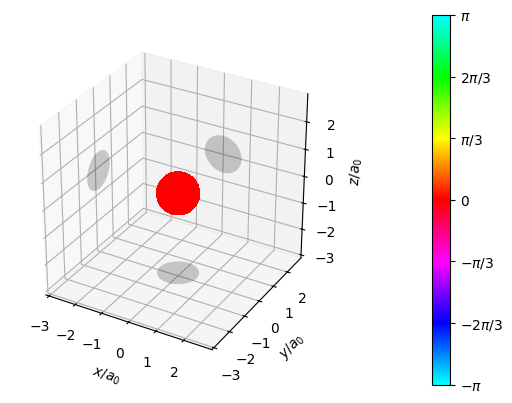

In [3]:
axis_limit = 3
qm = cf.QuantumMechanics(3,xlim=[-axis_limit,axis_limit],ylim=[-axis_limit,axis_limit],zlim=[-axis_limit,axis_limit],
                            xRes=50,yRes=50,zRes=50)
qm.conf_hydrogen_state(1, 0, 0)
qm.plot_complex_field(qm.psi)

A cute little red ball. In order to get an idea of what is happening inside, we can plot a 2D slice. 

(<Figure size 640x480 with 2 Axes>,
 <Axes3D: xlabel='$x/a_0$', ylabel='$y/a_0$', zlabel='$z/a_0$'>)

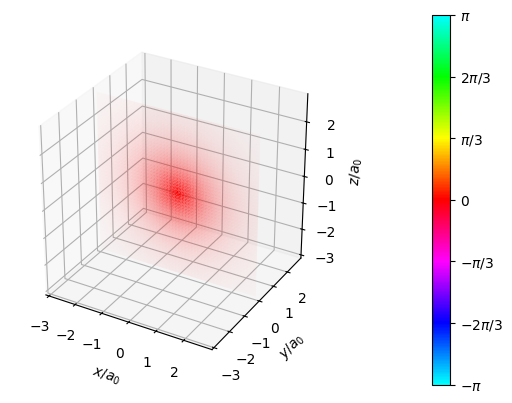

In [4]:
qm.plot_complex_field_in_plane(qm.psi,normal_vector=[0,1,0])

The magnitude is shown as the intensity of the color and the phase as the color (on the color bar). 

Now let's look at another state.

(<Figure size 640x480 with 2 Axes>,
 <Axes3D: xlabel='$x/a_0$', ylabel='$y/a_0$', zlabel='$z/a_0$'>)

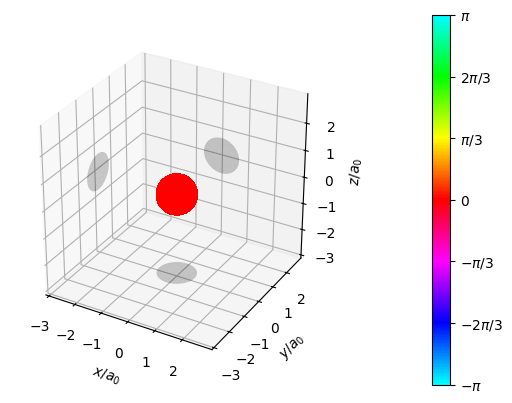

In [5]:
axis_limit = 3
qm = cf.QuantumMechanics(3,xlim=[-axis_limit,axis_limit],ylim=[-axis_limit,axis_limit],zlim=[-axis_limit,axis_limit])
qm.conf_hydrogen_state(2, 0, 0)
qm.plot_complex_field(qm.psi)

It doesnt seem to have changed much, but such a phase blob plot can be deceiving. We are only showing the isosurface at which the magnitude is 0.5 of _the maximum_. 
Therefore, this drawn isosurface might not be the same as the one for the ground state.
In fact, by plotting the slice, we see the general picture. 

(<Figure size 640x480 with 2 Axes>,
 <Axes3D: xlabel='$x/a_0$', ylabel='$y/a_0$', zlabel='$z/a_0$'>)

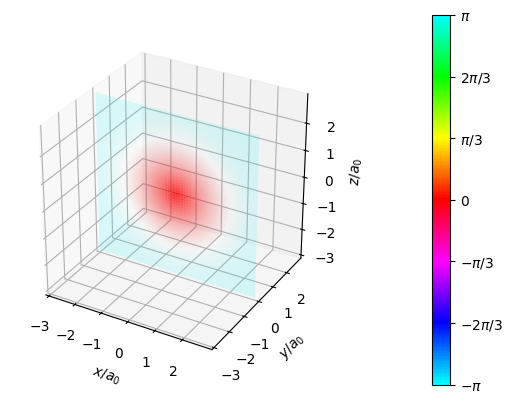

In [6]:
qm.plot_complex_field_in_plane(qm.psi)

We see that the function is more spread out, and that the function has picked up another layer with a different phase.
We we see this other phase better by reducing the `phase_blob_threshold` parameter to 0.1. 
The `phase_blob_threshold` parameter is the fraction of the maximum magnitude that the isosurface is drawn at.

(<Figure size 640x480 with 2 Axes>,
 <Axes3D: xlabel='$x/a_0$', ylabel='$y/a_0$', zlabel='$z/a_0$'>)

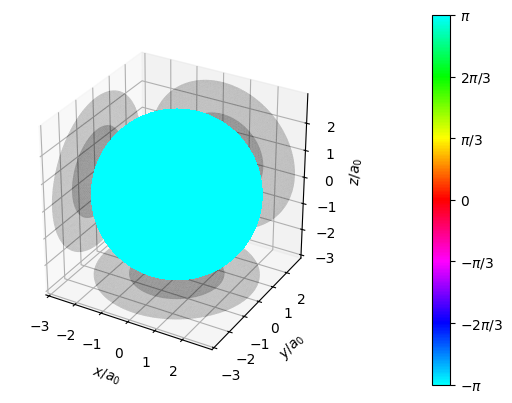

In [7]:
axis_limit = 3
qm = cf.QuantumMechanics(3,xlim=[-axis_limit,axis_limit],ylim=[-axis_limit,axis_limit],zlim=[-axis_limit,axis_limit])
qm.conf_hydrogen_state(2, 0, 0)
qm.plot_complex_field(qm.psi,phase_blob_threshold=0.1)

Now, let's look at a state which has a non-zero magnetic quantum number.

(<Figure size 640x480 with 2 Axes>,
 <Axes3D: xlabel='$x/a_0$', ylabel='$y/a_0$', zlabel='$z/a_0$'>)

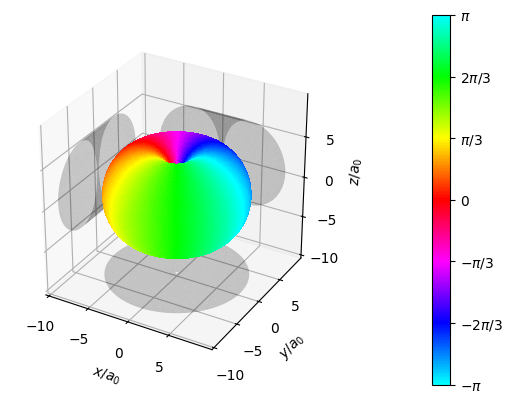

In [8]:
axis_limit = 10
qm = cf.QuantumMechanics(3,xlim=[-axis_limit,axis_limit],ylim=[-axis_limit,axis_limit],zlim=[-axis_limit,axis_limit])
qm.conf_hydrogen_state(2, 1, 1)
qm.plot_complex_field(qm.psi,phase_blob_threshold=0.2)

We see that the magnetic quantum number has caused the function to have a phase gradient along its surface. 

Let's animate this according to the Schrödinger equation.

In [9]:
# for n in range(50):
#     qm.evolve_schrodinger(5)
#     qm.plot_complex_field(qm.psi,phase_blob_threshold=0.2)
#     cf.tool_save_plot(n)
# cf.tool_make_animation_gif(n,name="hydrogen_evolution_free")

This did not evolve as expected.
The reason is that first, these are ground states only in the inifite system limit and second, we have not yet configured those parameters.
Let's do that now.

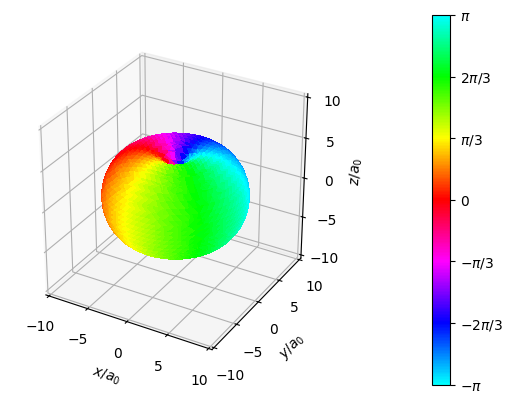

In [13]:
import numpy as np
axis_limit = 30 # almost infinite
qm = cf.QuantumMechanics(3,xlim=[-axis_limit,axis_limit],ylim=[-axis_limit,axis_limit],zlim=[-axis_limit,axis_limit])
r = np.sqrt(qm.x**2+qm.y**2+qm.z**2)
qm.V_ext = -1/r
qm.conf_hydrogen_state(2, 1, 1)
for n in range(100):
    qm.plot_complex_field(qm.psi,phase_blob_threshold=0.2,
        xlim=[-axis_limit/3,axis_limit/3],
        ylim=[-axis_limit/3,axis_limit/3],
        zlim=[-axis_limit/3,axis_limit/3], plot_shadows=False)
    if n != 49:
        qm.evolve_schrodinger(10)
    cf.tool_save_plot(n)
cf.tool_make_animation_gif(n,name="hydrogen_evolution_bound")

It might be surprising to see that 